<a href="https://colab.research.google.com/github/Ramya1410/Data-Science-Internship/blob/main/assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df_temp = pd.read_csv('Country-data.csv')

In [ ]:
df_temp.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Create a seperateDataFrame with only numeric data by remove the "country"column

In [ ]:
df = df_temp.drop('country',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
cols = df.columns

Scale the data using the Standard Scaler to create a scaled DataFrame

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_array = scaler.fit_transform(df)

In [ ]:
scaled_df = pd.DataFrame(scaled_df_array,columns = df.columns)

In [ ]:
scaled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


Plotting dendograms with the complete linkage method

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

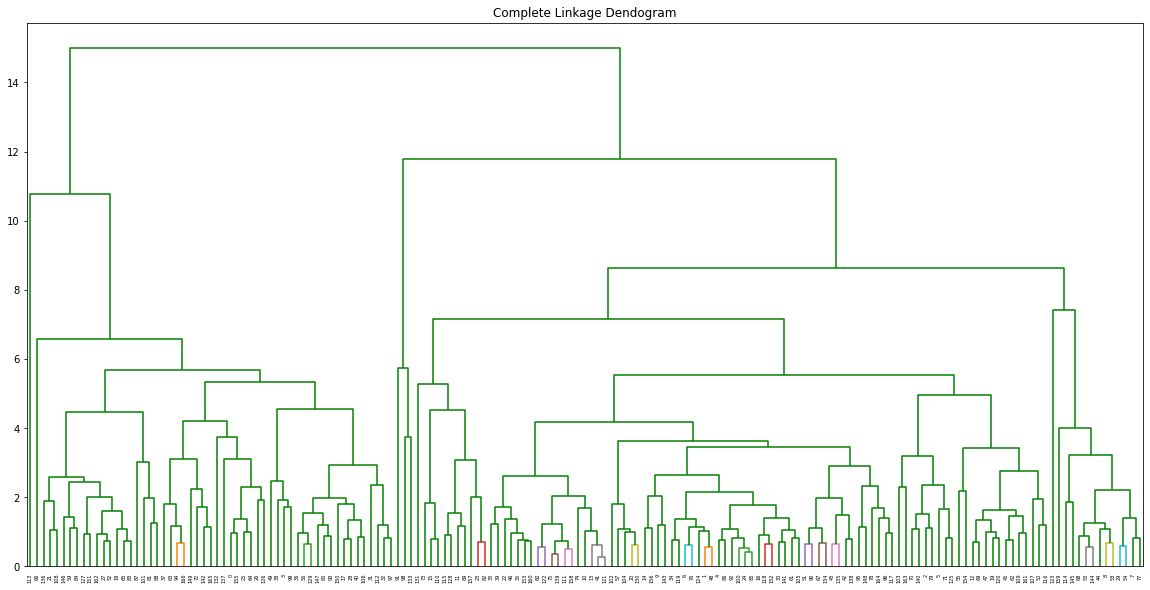

In [ ]:
x = np.array(scaled_df_array)
 
# Plot the hierarchical clustering as a dendrogram.
temp = hierarchy.linkage(x, 'complete')
plt.figure(figsize = (20,10))
plt.title("Complete Linkage Dendogram")
 
dn = hierarchy.dendrogram(temp, above_threshold_color="green", color_threshold=.7)

Creating cluster labels using cut tree

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')  
res = cluster.fit_predict(scaled_df) 
scaled_df['Hierarchical_Cluster_Labels'] = res

In [ ]:
scaled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hierarchical_Cluster_Labels
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0
...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,1
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,0
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,0
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,1


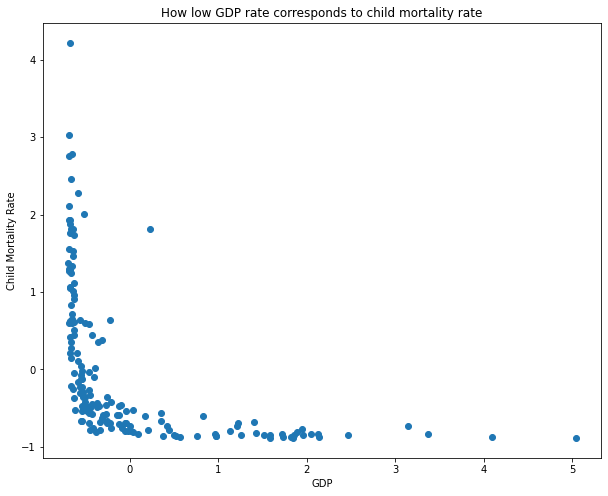

In [ ]:
plt.figure(figsize=(10,8))
#x = scaled_df['gdpp']
#y = scaled_df['child_mort']
plt.scatter(scaled_df['gdpp'], scaled_df['child_mort'])
plt.xlabel('GDP')
plt.ylabel('Child Mortality Rate')
plt.title("How low GDP rate corresponds to child mortality rate")
plt.show()

Problem 2

In [ ]:
df = pd.read_csv('Credit Card Customer Data.csv')

In [ ]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


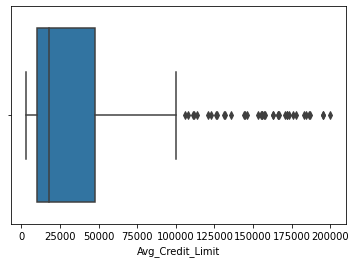

In [ ]:
sns.boxplot(df['Avg_Credit_Limit'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


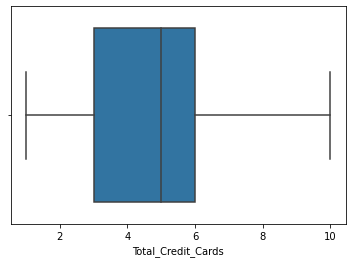

In [ ]:
sns.boxplot(df['Total_Credit_Cards'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


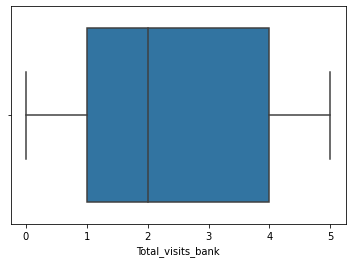

In [ ]:
sns.boxplot(df['Total_visits_bank'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


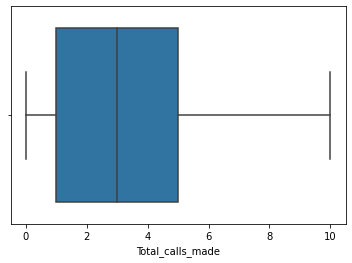

In [ ]:
sns.boxplot(df['Total_calls_made'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


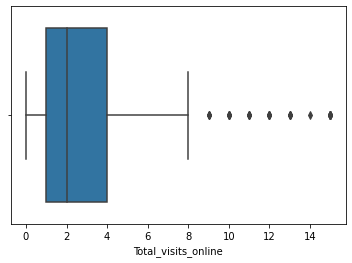

In [ ]:
sns.boxplot(df['Total_visits_online'])

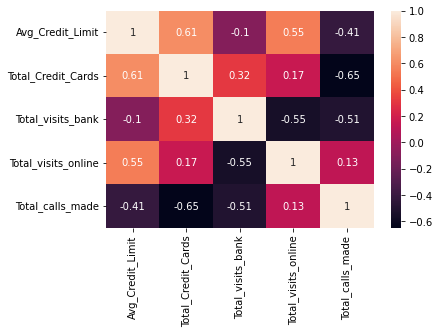

In [ ]:
sns.heatmap(df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online','Total_calls_made']].corr(), annot=True)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_array = scaler.fit_transform(df)
scaled_df_array

array([[-1.72942847,  1.24691971,  1.74018685, ..., -0.86045063,
        -0.54748969, -1.25153737],
       [-1.72417983, -0.65320273,  0.41029254, ..., -1.47373077,
         2.5205186 ,  1.89185881],
       [-1.71893118, -1.47609839,  0.41029254, ..., -0.86045063,
         0.13428993,  0.1455276 ],
       ...,
       [ 1.71893118, -0.05105538,  2.93709172, ..., -0.86045063,
         2.17962879, -0.90227113],
       [ 1.72417983,  0.99629832,  3.65523464, ..., -0.86045063,
         4.22496765, -1.25153737],
       [ 1.72942847,  0.97657819,  3.52224521, ..., -1.47373077,
         3.20229822, -0.55300488]])

In [ ]:
scaled_data = pd.DataFrame(scaled_df_array,columns = df.columns)

In [ ]:
scaled_data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-1.729428,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,-1.724180,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,-1.718931,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-1.713683,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,-1.708434,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...,...,...
655,1.708434,-0.157505,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.713683,0.218310,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,1.718931,-0.051055,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,1.724180,0.996298,3.655235,2.443892,-0.860451,4.224968,-1.251537


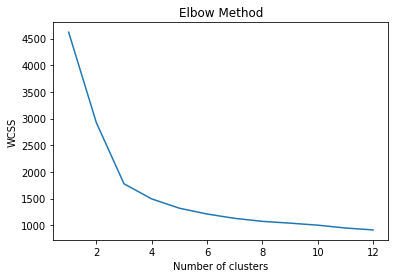

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 13), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
km = KMeans(n_clusters=3, random_state=42)
from sklearn.metrics import  silhouette_score

In [ ]:
km.fit_predict(scaled_data)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
score = silhouette_score(scaled_data, labels = km.labels_, metric='euclidean')

In [ ]:
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.444


In [ ]:
scaled_data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-1.729428,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,-1.724180,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,-1.718931,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-1.713683,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,-1.708434,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739


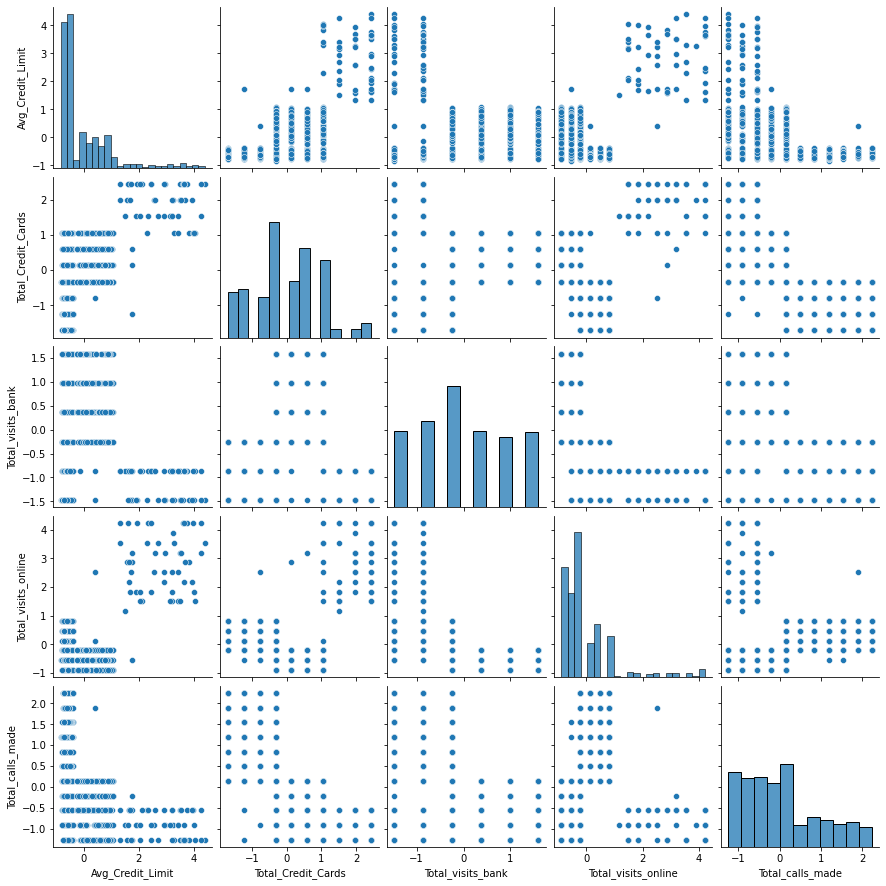

In [ ]:
sns.pairplot(scaled_data[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online','Total_calls_made']])

In [ ]:
kmeans.cluster_centers_.ravel()

array([-0.21125795, -0.50370396, -0.55111021,  0.48192377, -0.05552044,
       -0.56169344, -0.51662298, -1.18231973,  0.71701566, -0.56327453,
       -1.13931057, -0.84098142,  0.22627606,  0.43935476,  0.94654061,
        0.97075041,  0.46933985,  0.52347134,  0.07173519, -0.57476088,
       -0.50410761,  0.92873095, -0.77682929,  0.30899421,  0.31249222,
        1.26645711, -0.55474267, -0.56043608,  1.60095078,  0.76098785,
        3.46673658,  1.84175349, -1.12709417,  3.17265562, -0.88708564,
       -0.01475644,  0.98202788, -0.58516605,  0.26434773,  0.81852944,
       -0.53072462, -0.6446157 ,  0.95484962,  0.9544152 ,  0.4425169 ,
        0.49080146,  1.28602988, -0.58026756, -0.54628823, -1.13102885,
       -0.97479524, -0.60152395, -0.95891532, -0.89206301,  0.37677855,
        1.1573195 ,  0.85363152, -0.68306498,  0.43402604,  0.29194132,
        0.08305729, -0.54224524, -0.52613825,  1.36532804, -0.53490942,
        2.2908616 ,  1.87966592, -1.08759142,  2.53314414, -0.86

In [ ]:
kmeans.cluster_centers_

array([[-0.21125795, -0.50370396, -0.55111021,  0.48192377, -0.05552044,
        -0.56169344, -0.51662298],
       [-1.18231973,  0.71701566, -0.56327453, -1.13931057, -0.84098142,
         0.22627606,  0.43935476],
       [ 0.94654061,  0.97075041,  0.46933985,  0.52347134,  0.07173519,
        -0.57476088, -0.50410761],
       [ 0.92873095, -0.77682929,  0.30899421,  0.31249222,  1.26645711,
        -0.55474267, -0.56043608],
       [ 1.60095078,  0.76098785,  3.46673658,  1.84175349, -1.12709417,
         3.17265562, -0.88708564],
       [-0.01475644,  0.98202788, -0.58516605,  0.26434773,  0.81852944,
        -0.53072462, -0.6446157 ],
       [ 0.95484962,  0.9544152 ,  0.4425169 ,  0.49080146,  1.28602988,
        -0.58026756, -0.54628823],
       [-1.13102885, -0.97479524, -0.60152395, -0.95891532, -0.89206301,
         0.37677855,  1.1573195 ],
       [ 0.85363152, -0.68306498,  0.43402604,  0.29194132,  0.08305729,
        -0.54224524, -0.52613825],
       [ 1.36532804, -0.5349

In [ ]:
#This gives cluster for each data point
y  = np.array(x)
kmeans_model = KMeans(n_clusters=3, random_state=32932)
kmeans_predict = kmeans_model.fit_predict(y)
kmeans_predict

#This gives coordinate of each cluster
a = kmeans_model.cluster_centers_
print(a)

[[-0.82744866  0.64507985  0.72741122  0.19063895  1.48424268 -0.48492064
   1.07957853 -0.79187687  1.61599536]
 [-0.40645337 -0.03165259 -0.2244709   0.02416161 -0.25177041 -0.01716742
   0.25473362 -0.42434279 -0.35448141]
 [ 1.36021776 -0.43753313 -0.15598401 -0.18920377 -0.68689408  0.40211078
  -1.28217981  1.36494385 -0.60424243]]


Problem 3

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Find the correlation among the all the columns and drop the column/s with the least correlation

In [ ]:
df.corr(method='kendall')

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.004774,0.991218,0.000961
Age,0.004774,1.000000,0.008198,-0.210757
Annual Income (k$),0.991218,0.008198,1.000000,-0.000765
Spending Score (1-100),0.000961,-0.210757,-0.000765,1.000000


In [ ]:
df = df.drop(['CustomerID'],axis =1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df = pd.get_dummies(df, columns = ['Gender']) 


KeyError: ignored

In [ ]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)
db = DBSCAN(eps=12.5, min_samples=4).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

['y', 'b', 'g', 'r']


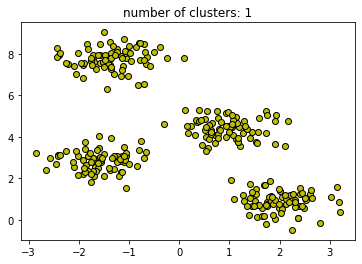

In [ ]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
  
    class_member_mask = (labels == k)
  
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
plt.title('number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
for i in range(len(kmeans.cluster_centers_)):
  print("Cluster", i)
  print("Size:", sum(kmeans.labels_ == i))

Cluster 0
Size: 48
Cluster 1
Size: 63
Cluster 2
Size: 50
Cluster 3
Size: 47
Cluster 4
Size: 23
Cluster 5
Size: 61
Cluster 6
Size: 52
Cluster 7
Size: 97
Cluster 8
Size: 65
Cluster 9
Size: 27
Cluster 10
Size: 63
Cluster 11
Size: 64


Text(0.5, 1.0, 'how annual income corresponds to spending rate')

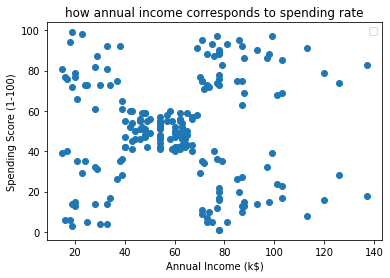

In [ ]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.title("how annual income corresponds to spending rate")

Problem 4

In [ ]:
df = pd.read_csv('Groceries data.csv')

In [ ]:
df

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2


In [ ]:
!pip install mlxtend 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
newdf = df.loc[(df.Member_number == 1001)]
newdf

,Member_number,Date,itemDescription,year,month,day,day_of_week
364,1001,2015-01-20,frankfurter,2015,1,20,1
5695,1001,2015-02-05,frankfurter,2015,2,5,3
6612,1001,2015-04-14,beef,2015,4,14,1
9391,1001,2014-07-02,sausage,2014,7,2,2
11046,1001,2014-12-12,whole milk,2014,12,12,4
16513,1001,2015-01-20,soda,2015,1,20,1
21844,1001,2015-02-05,curd,2015,2,5,3
22761,1001,2015-04-14,white bread,2015,4,14,1
25540,1001,2014-07-02,whole milk,2014,7,2,2
27195,1001,2014-12-12,soda,2014,12,12,4


In [ ]:
df['item count'] = 1

In [ ]:
df

,Member_number,Date,itemDescription,year,month,day,day_of_week,item count
0,1808,2015-07-21,tropical fruit,2015,7,21,1,1
1,2552,2015-05-01,whole milk,2015,5,1,4,1
2,2300,2015-09-19,pip fruit,2015,9,19,5,1
3,1187,2015-12-12,other vegetables,2015,12,12,5,1
4,3037,2015-01-02,whole milk,2015,1,2,4,1
...,...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6,1
38761,2022,2014-02-23,candy,2014,2,23,6,1
38762,1097,2014-04-16,cake bar,2014,4,16,2,1
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2,1


In [ ]:
df = df.drop(['year','month','day','day_of_week'],1)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Member_number,Date,itemDescription,item count
0,1808,2015-07-21,tropical fruit,1
1,2552,2015-05-01,whole milk,1
2,2300,2015-09-19,pip fruit,1
3,1187,2015-12-12,other vegetables,1
4,3037,2015-01-02,whole milk,1


In [ ]:
dfgroup = df.groupby(['itemDescription'])
dfgroup.first()

,Member_number,Date,item count
itemDescription,,,
Instant food products,1746,2015-02-15,1
UHT-milk,2836,2015-12-29,1
abrasive cleaner,2421,2015-11-21,1
artif. sweetener,1273,2015-04-05,1
baby cosmetics,2070,2015-12-19,1
...,...,...,...
white bread,3950,2015-01-10,1
white wine,4389,2015-04-13,1
whole milk,2552,2015-05-01,1


In [ ]:
dfgroup2 = df.groupby(['Member_number'])
dfgroup2.first()

,Date,itemDescription,item count
Member_number,,,
1000,2015-05-27,soda,1
1001,2015-01-20,frankfurter,1
1002,2015-04-26,tropical fruit,1
1003,2015-10-02,sausage,1
1004,2015-02-12,other vegetables,1
...,...,...,...
4996,2015-10-24,dessert,1
4997,2015-12-27,tropical fruit,1
4998,2015-10-14,rolls/buns,1


In [ ]:
dfgroup = df.groupby(['itemDescription','Member_number'])
dfgroup.first()

Date  item count
itemDescription       Member_number                        
Instant food products 1038           2015-12-14           1
                      1045           2014-10-04           1
                      1061           2015-05-09           1
                      1092           2015-07-27           1
                      1298           2015-07-27           1
...                                         ...         ...
zwieback              4765           2015-05-07           1
                      4809           2015-04-13           1
                      4828           2014-10-28           1
                      4836           2015-11-13           1
                      4879           2014-09-19           1

[34766 rows x 2 columns]

In [ ]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=1ff72516329a0c903a89e1ae76c53451786b803530ed29fef0a24894dd4e0006
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
df

,Member_number,Date,itemDescription,item count
0,1808,2015-07-21,tropical fruit,1
1,2552,2015-05-01,whole milk,1
2,2300,2015-09-19,pip fruit,1
3,1187,2015-12-12,other vegetables,1
4,3037,2015-01-02,whole milk,1
...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,1
38761,2022,2014-02-23,candy,1
38762,1097,2014-04-16,cake bar,1
38763,1510,2014-03-12,fruit/vegetable juice,1


In [ ]:
df1 = pd.read_csv('Groceries data.csv', header = None)
df1.head()

,0,1,2,3,4,5,6
0,Member_number,Date,itemDescription,year,month,day,day_of_week
1,1808,2015-07-21,tropical fruit,2015,7,21,1
2,2552,2015-05-01,whole milk,2015,5,1,4
3,2300,2015-09-19,pip fruit,2015,9,19,5
4,1187,2015-12-12,other vegetables,2015,12,12,5


In [ ]:
df1 = df1.drop([3,4,5,6],axis =1)

In [ ]:
df1

,0,1,2
0,Member_number,Date,itemDescription
1,1808,2015-07-21,tropical fruit
2,2552,2015-05-01,whole milk
3,2300,2015-09-19,pip fruit
4,1187,2015-12-12,other vegetables
...,...,...,...
38761,4471,2014-08-10,sliced cheese
38762,2022,2014-02-23,candy
38763,1097,2014-04-16,cake bar
38764,1510,2014-03-12,fruit/vegetable juice


In [ ]:
records = []  
for i in range(0, 38765):  
    records.append([str(df.values[i,j]) for j in range(0, 3)])
records

[['1808', '2015-07-21', 'tropical fruit'],
 ['2552', '2015-05-01', 'whole milk'],
 ['2300', '2015-09-19', 'pip fruit'],
 ['1187', '2015-12-12', 'other vegetables'],
 ['3037', '2015-01-02', 'whole milk'],
 ['4941', '2015-02-14', 'rolls/buns'],
 ['4501', '2015-08-05', 'other vegetables'],
 ['3803', '2015-12-23', 'pot plants'],
 ['2762', '2015-03-20', 'whole milk'],
 ['4119', '2015-12-02', 'tropical fruit'],
 ['1340', '2015-02-24', 'citrus fruit'],
 ['2193', '2015-04-14', 'beef'],
 ['1997', '2015-07-21', 'frankfurter'],
 ['4546', '2015-03-09', 'chicken'],
 ['4736', '2015-07-21', 'butter'],
 ['1959', '2015-03-30', 'fruit/vegetable juice'],
 ['1974', '2015-03-05', 'packaged fruit/vegetables'],
 ['2421', '2015-02-09', 'chocolate'],
 ['1513', '2015-03-08', 'specialty bar'],
 ['1905', '2015-07-07', 'other vegetables'],
 ['2810', '2015-08-09', 'butter milk'],
 ['2867', '2015-12-11', 'whole milk'],
 ['3962', '2015-09-18', 'tropical fruit'],
 ['1088', '2015-11-30', 'tropical fruit'],
 ['4976', '2

In [ ]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from apyori import apriori  

In [ ]:
association_rules = apriori(records, min_support=0.0045,use_colnames = True)  
association_results = list(association_rules)

In [ ]:
print(len(association_results))  
print(association_results[0]) 

60
RelationRecord(items=frozenset({'UHT-milk'}), support=0.00833225848058816, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'UHT-milk'}), confidence=0.00833225848058816, lift=1.0)])


In [ ]:
print(association_results)

[RelationRecord(items=frozenset({'UHT-milk'}), support=0.00833225848058816, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'UHT-milk'}), confidence=0.00833225848058816, lift=1.0)]), RelationRecord(items=frozenset({'beef'}), support=0.013310976396233716, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'beef'}), confidence=0.013310976396233716, lift=1.0)]), RelationRecord(items=frozenset({'berries'}), support=0.008435444344124856, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'berries'}), confidence=0.008435444344124856, lift=1.0)]), RelationRecord(items=frozenset({'beverages'}), support=0.006474912936927641, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'beverages'}), confidence=0.006474912936927641, lift=1.0)]), RelationRecord(items=frozenset({'bottled beer'}), support=0.017722172062427446, ordered_statistics=[OrderedStatistic(items_base=frozenset

In [ ]:
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    
    pair = item[0] 
    items = [x for x in pair]
    #print(items)
    #print("Rule: " + items[0] + " -> " + items[])

    #second index of the inner list
    print("Support: " + str(item[0]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(items[0]))
    print("Lift: " + str(items[0]))
    print("=====================================")

Support: frozenset({'UHT-milk'})
Confidence: UHT-milk
Lift: UHT-milk
Support: frozenset({'beef'})
Confidence: beef
Lift: beef
Support: frozenset({'berries'})
Confidence: berries
Lift: berries
Support: frozenset({'beverages'})
Confidence: beverages
Lift: beverages
Support: frozenset({'bottled beer'})
Confidence: bottled beer
Lift: bottled beer
Support: frozenset({'bottled water'})
Confidence: bottled water
Lift: bottled water
Support: frozenset({'brown bread'})
Confidence: brown bread
Lift: brown bread
Support: frozenset({'butter'})
Confidence: butter
Lift: butter
Support: frozenset({'butter milk'})
Confidence: butter milk
Lift: butter milk
Support: frozenset({'candy'})
Confidence: candy
Lift: candy
Support: frozenset({'canned beer'})
Confidence: canned beer
Lift: canned beer
Support: frozenset({'cat food'})
Confidence: cat food
Lift: cat food
Support: frozenset({'chewing gum'})
Confidence: chewing gum
Lift: chewing gum
Support: frozenset({'chicken'})
Confidence: chicken
Lift: chicken
S